<a href="https://colab.research.google.com/github/eshanshrm1/Signature-Extraction/blob/main/2_Signature_Extraction_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About OpenCV**

OpenCV (Open Source Computer Vision Library), often referred to as cv2 in Python, is an open-source computer vision and machine learning software library. It provides a vast collection of tools, algorithms, and functions for a wide range of tasks related to image and video processing, computer vision, and machine learning. OpenCV is widely used in various industries, research, and academia for developing applications that involve visual data.

Here are some of the key aspects and functionalities of OpenCV (cv2):



*   **Image Loading and Manipulation:** OpenCV allows you to load, display, and manipulate images. You can perform operations such as resizing, cropping, rotating, and flipping images.
*   **Image Filtering and Enhancement:** The library provides functions for applying various filters, such as blurring, sharpening, and edge detection. These filters are useful for enhancing image quality or extracting specific features.
*   **Feature Detection and Matching:** OpenCV supports feature detection and matching algorithms, which are crucial for tasks like object recognition, image stitching, and tracking. It includes methods like Harris corners, Shi-Tomasi corners, and various descriptor matching techniques.
*   **Object Detection:** OpenCV offers tools for object detection using techniques like Haar cascades, which are used for detecting predefined objects in images or videos. More advanced techniques, such as deep learning-based object detection, can also be used.
*   **Camera Calibration and 3D Vision:** OpenCV helps calibrate cameras, correct lens distortions, and estimate camera intrinsic and extrinsic parameters. These capabilities are essential for tasks involving 3D reconstruction and augmented reality.

*   **Video Processing:** OpenCV supports video capture, playback, and manipulation. It can process video frames in real-time and perform tasks like motion analysis, background subtraction, and video stabilization.
*   **Machine Learning Integration:** While not a full-fledged machine learning library, OpenCV includes basic machine learning tools such as support vector machines (SVMs), k-nearest neighbors (KNN), and decision trees.

*   **Graphical User Interface (GUI):** OpenCV provides GUI functions for creating windows, displaying images and videos, and capturing user input via keyboard or mouse.
*   **Deep Learning Integration:** OpenCV has incorporated features to work with deep learning frameworks like TensorFlow and PyTorch, enabling integration of deep neural networks for various computer vision tasks.


**More Information** - https://opencv.org/

























**Signature Extraction Using OpenCV**

Let's take the OpenCV and apply it in a real-world scenario where we need to check if a document is signed or not. We'll undertake the task of extracting signature from Image.

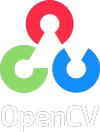

**Summary of Code**

The code below defines a Python function named extract_signatures that processes an input image to identify and extract potential signature regions. The extracted regions are stored in a list and visualized by drawing rectangles around them in the original image. This code snippet can serve as a template for building an automated signature extraction system.

**Key Steps:**

The extract_signatures function performs the following steps:

*   Load the input image and convert it to grayscale.
*   Apply Gaussian blur to reduce noise.
*   Perform edge detection using Canny.
*   Find contours in the edge-detected image.
*   Iterate over the contours and filter out small ones.
*   Extract signature regions based on the bounding rectangles of the contours.
*   Draw green rectangles around the extracted signature regions in the original image.
*   Save the modified image with rectangles drawn (for visualization).
*   Return the list of extracted signature regions.


**STEP 1 - Library Installation**

Use the pip package manager to install the cv2, matplotlib and numpy libraries, if they are not already installed.

In [ ]:
!pip install cv2
!pip install numpy as np
!pip install matplotlib

**STEP 2 - Library Import**

Import necessary libraries, including cv2, matplotlib and NumPy.

In [1]:
import cv2
import numpy as np
from IPython.display import Image, display
from google.colab.patches import cv2_imshow  # Import to display the image in Google Colab
import matplotlib.pyplot as plt

**STEP 3 - Function for Signature Extraction**

Define extract_signatures function, it processes an input image to detect and extract signature regions within it. The function takes two arguments: the path to the input image and the desired output path for saving the result.

In [2]:
def extract_signatures(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a list to store signature regions
    signature_regions = []

    for contour in contours:
        # Ignore small contours
        if cv2.contourArea(contour) < 300:
            continue

        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the signature region from the original image
        signature_region = image[y:y+h, x:x+w]

        # Add the signature region to the list
        signature_regions.append(signature_region)

        # Draw a rectangle around the signature in the original image (for visualization)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the image with drawn rectangles (for visualization)
    cv2.imwrite(output_path, image)

    return signature_regions

**STEP 4 - Define Input and Output Path**

Add the input path of the image along with output path where extracted signature region will be stored

In [3]:
# Path to the input image
input_image_path = 'signed5.jpeg'

# Path to save the output image with drawn rectangles
output_image_path = 'output_image.jpg'

# Extract signatures and get a list of signature regions
extracted_signatures = extract_signatures(input_image_path, output_image_path)

**STEP 5 - Display the Signature Region**

Display the highlighted region of signature

Number of extracted signatures: 8


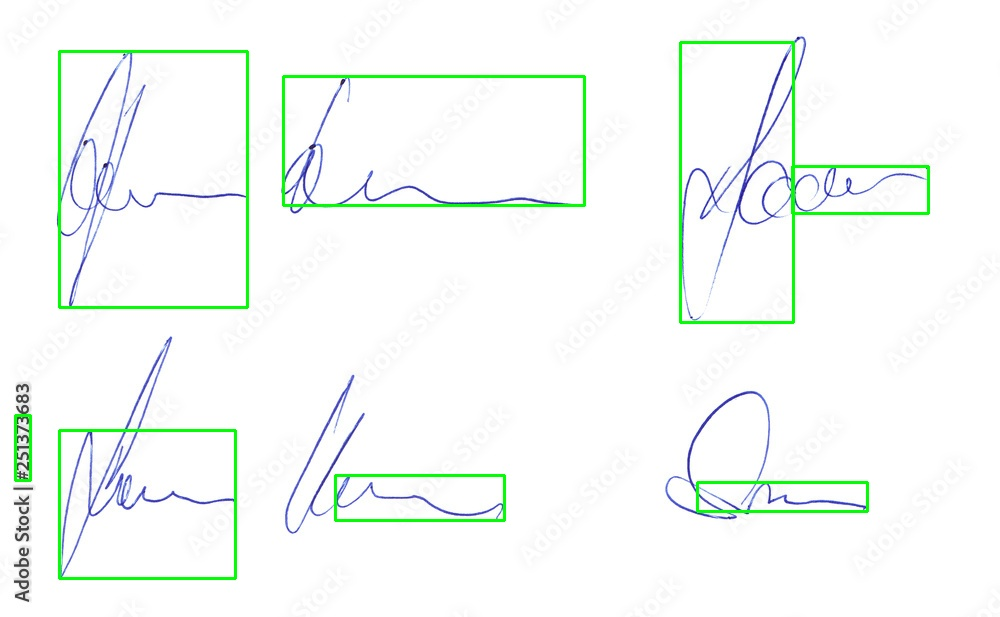

In [4]:
# Display the number of extracted signatures
print(f"Number of extracted signatures: {len(extracted_signatures)}")

from IPython.display import Image, display
display(Image(output_image_path,height=500,width=700))

**STEP 6 - Display the Extracted Region**

Below code will display the extracted region from the image

**Option 1 - Using cv2_imshow**

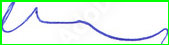

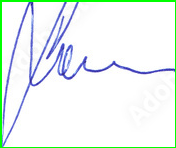

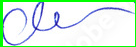

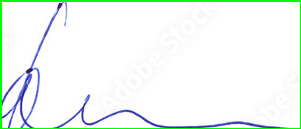

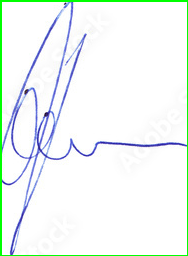

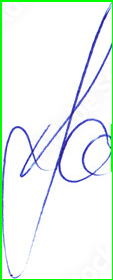

In [5]:
from google.colab.patches import cv2_imshow  # Import the correct function

for i, signature in enumerate(extracted_signatures):
    cv2_imshow(signature)

**Option 2 - Using Matplotlib**

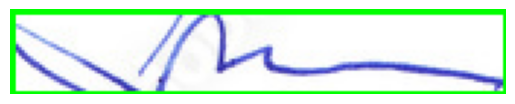

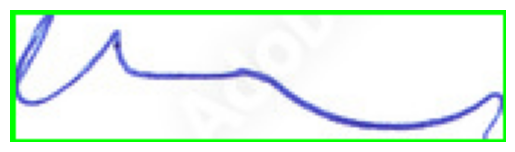

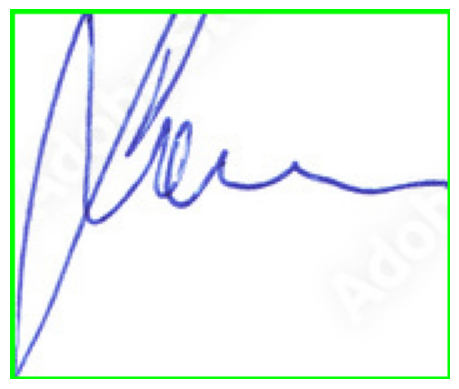

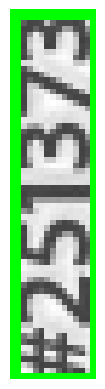

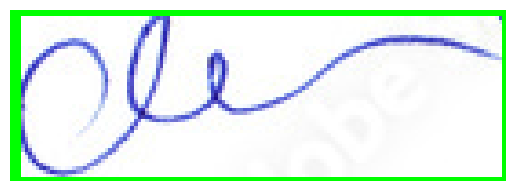

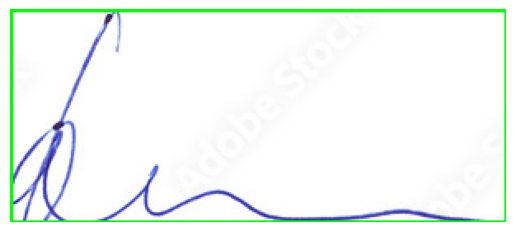

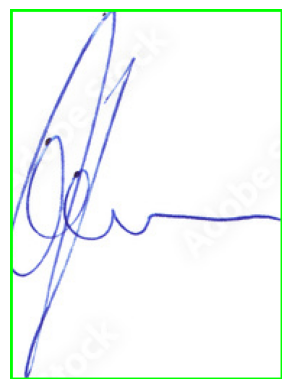

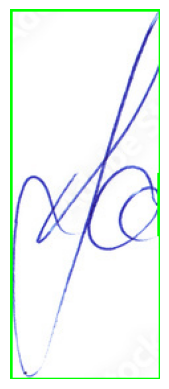

In [6]:
for i, signature in enumerate(extracted_signatures):
    plt.imshow(cv2.cvtColor(signature, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

**Conclusion and Future Use**

This code provides a foundation for building an automated signature extraction system. It can be used as a template for various tasks that involve region-based image analysis. By customizing and extending this template, you can create applications such as:



*   **Automated Document Processing:** This code can be integrated into document management systems to automatically extract signatures from scanned documents, contracts, or forms.
*   **Signature Verification:** Once signatures are extracted, future tasks might involve applying signature verification techniques to authenticate signatures and match them against reference signatures.
*   **Data Collection:** This template can be adapted for data collection tasks, where specific regions (not just signatures) need to be located and extracted from images.
*   **Object Detection and Localization:** The principles used here can be generalized for detecting and extracting other objects or regions of interest within images, such as logos, stamps, or specific patterns.
*   **Customizing Thresholds:** Depending on the specific use case, you might need to adjust the contour area threshold or other parameters to suit the image characteristics and the desired regions.















